In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../data/raw/Quote-Equity-BHARTIARTL-EQ-01-01-2025-to-19-10-2025.csv')
data.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,17-Oct-2025,EQ,"1,973.60","2,034.30","1,970.30","1,967.40","2,012.90","2,012.00","2,013.74","2,045.80","1,511.00","67,43,801","13,58,02,90,074.70","2,02,098"
1,16-Oct-2025,EQ,"1,962.30","1,986.90","1,962.00","1,968.50","1,970.20","1,967.40","1,973.83","2,045.80","1,511.00","37,00,674","7,30,45,00,778.70","2,46,779"
2,15-Oct-2025,EQ,"1,957.20","1,976.00","1,951.60","1,946.60","1,967.00","1,968.50","1,965.08","2,045.80","1,511.00","34,47,352","6,77,43,13,245.80","1,32,066"
3,14-Oct-2025,EQ,"1,964.00","1,964.00","1,939.20","1,954.90","1,948.20","1,946.60","1,948.36","2,045.80","1,511.00","44,54,239","8,67,84,47,974.60","1,15,211"
4,13-Oct-2025,EQ,"1,937.90","1,965.90","1,936.00","1,939.90","1,955.00","1,954.90","1,955.22","2,045.80","1,511.00","36,72,419","7,18,03,72,108.10","1,34,124"


In [3]:
data.tail()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
194,07-Jan-2025,EQ,"1,594.00","1,603.00","1,584.05","1,588.45","1,591.00","1,590.85","1,591.45","1,779.00","1,045.25","28,30,856","4,50,51,79,409.10","1,10,398"
195,06-Jan-2025,EQ,"1,596.15","1,609.85","1,567.10","1,598.85","1,589.35","1,588.45","1,589.02","1,779.00","1,045.25","45,84,188","7,28,43,66,528.40","1,26,704"
196,03-Jan-2025,EQ,"1,615.00","1,617.00","1,593.30","1,609.70","1,594.00","1,598.85","1,601.48","1,779.00","1,007.00","36,69,685","5,87,69,19,268.40","1,28,800"
197,02-Jan-2025,EQ,"1,599.90","1,619.60","1,588.40","1,595.70","1,613.00","1,609.70","1,608.78","1,779.00","1,007.00","37,28,040","5,99,76,12,867.30","1,89,267"
198,01-Jan-2025,EQ,"1,593.00","1,606.55","1,584.05","1,587.75","1,597.95","1,595.70","1,594.42","1,779.00","1,007.00","14,05,565","2,24,10,59,050.30","63,674"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           199 non-null    object
 1   series         199 non-null    object
 2   OPEN           199 non-null    object
 3   HIGH           199 non-null    object
 4   LOW            199 non-null    object
 5   PREV. CLOSE    199 non-null    object
 6   ltp            199 non-null    object
 7   close          199 non-null    object
 8   vwap           199 non-null    object
 9   52W H          199 non-null    object
 10  52W L          199 non-null    object
 11  VOLUME         199 non-null    object
 12  VALUE          199 non-null    object
 13  No of trades   199 non-null    object
dtypes: object(14)
memory usage: 21.9+ KB


In [5]:
data['Date ']=pd.to_datetime(data['Date '])

In [7]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '', regex=True)
        data[col] = pd.to_numeric(data[col], errors='ignore')

In [8]:
data

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,2025-10-17,EQ,1973.60,2034.30,1970.30,1967.40,2012.90,2012.00,2013.74,2045.8,1511.00,6743801,1.358029e+10,202098
1,2025-10-16,EQ,1962.30,1986.90,1962.00,1968.50,1970.20,1967.40,1973.83,2045.8,1511.00,3700674,7.304501e+09,246779
2,2025-10-15,EQ,1957.20,1976.00,1951.60,1946.60,1967.00,1968.50,1965.08,2045.8,1511.00,3447352,6.774313e+09,132066
3,2025-10-14,EQ,1964.00,1964.00,1939.20,1954.90,1948.20,1946.60,1948.36,2045.8,1511.00,4454239,8.678448e+09,115211
4,2025-10-13,EQ,1937.90,1965.90,1936.00,1939.90,1955.00,1954.90,1955.22,2045.8,1511.00,3672419,7.180372e+09,134124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2025-01-07,EQ,1594.00,1603.00,1584.05,1588.45,1591.00,1590.85,1591.45,1779.0,1045.25,2830856,4.505179e+09,110398
195,2025-01-06,EQ,1596.15,1609.85,1567.10,1598.85,1589.35,1588.45,1589.02,1779.0,1045.25,4584188,7.284367e+09,126704
196,2025-01-03,EQ,1615.00,1617.00,1593.30,1609.70,1594.00,1598.85,1601.48,1779.0,1007.00,3669685,5.876919e+09,128800
197,2025-01-02,EQ,1599.90,1619.60,1588.40,1595.70,1613.00,1609.70,1608.78,1779.0,1007.00,3728040,5.997613e+09,189267


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           199 non-null    datetime64[ns]
 1   series         199 non-null    object        
 2   OPEN           199 non-null    float64       
 3   HIGH           199 non-null    float64       
 4   LOW            199 non-null    float64       
 5   PREV. CLOSE    199 non-null    float64       
 6   ltp            199 non-null    float64       
 7   close          199 non-null    float64       
 8   vwap           199 non-null    float64       
 9   52W H          199 non-null    float64       
 10  52W L          199 non-null    float64       
 11  VOLUME         199 non-null    int64         
 12  VALUE          199 non-null    float64       
 13  No of trades   199 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 21.9+

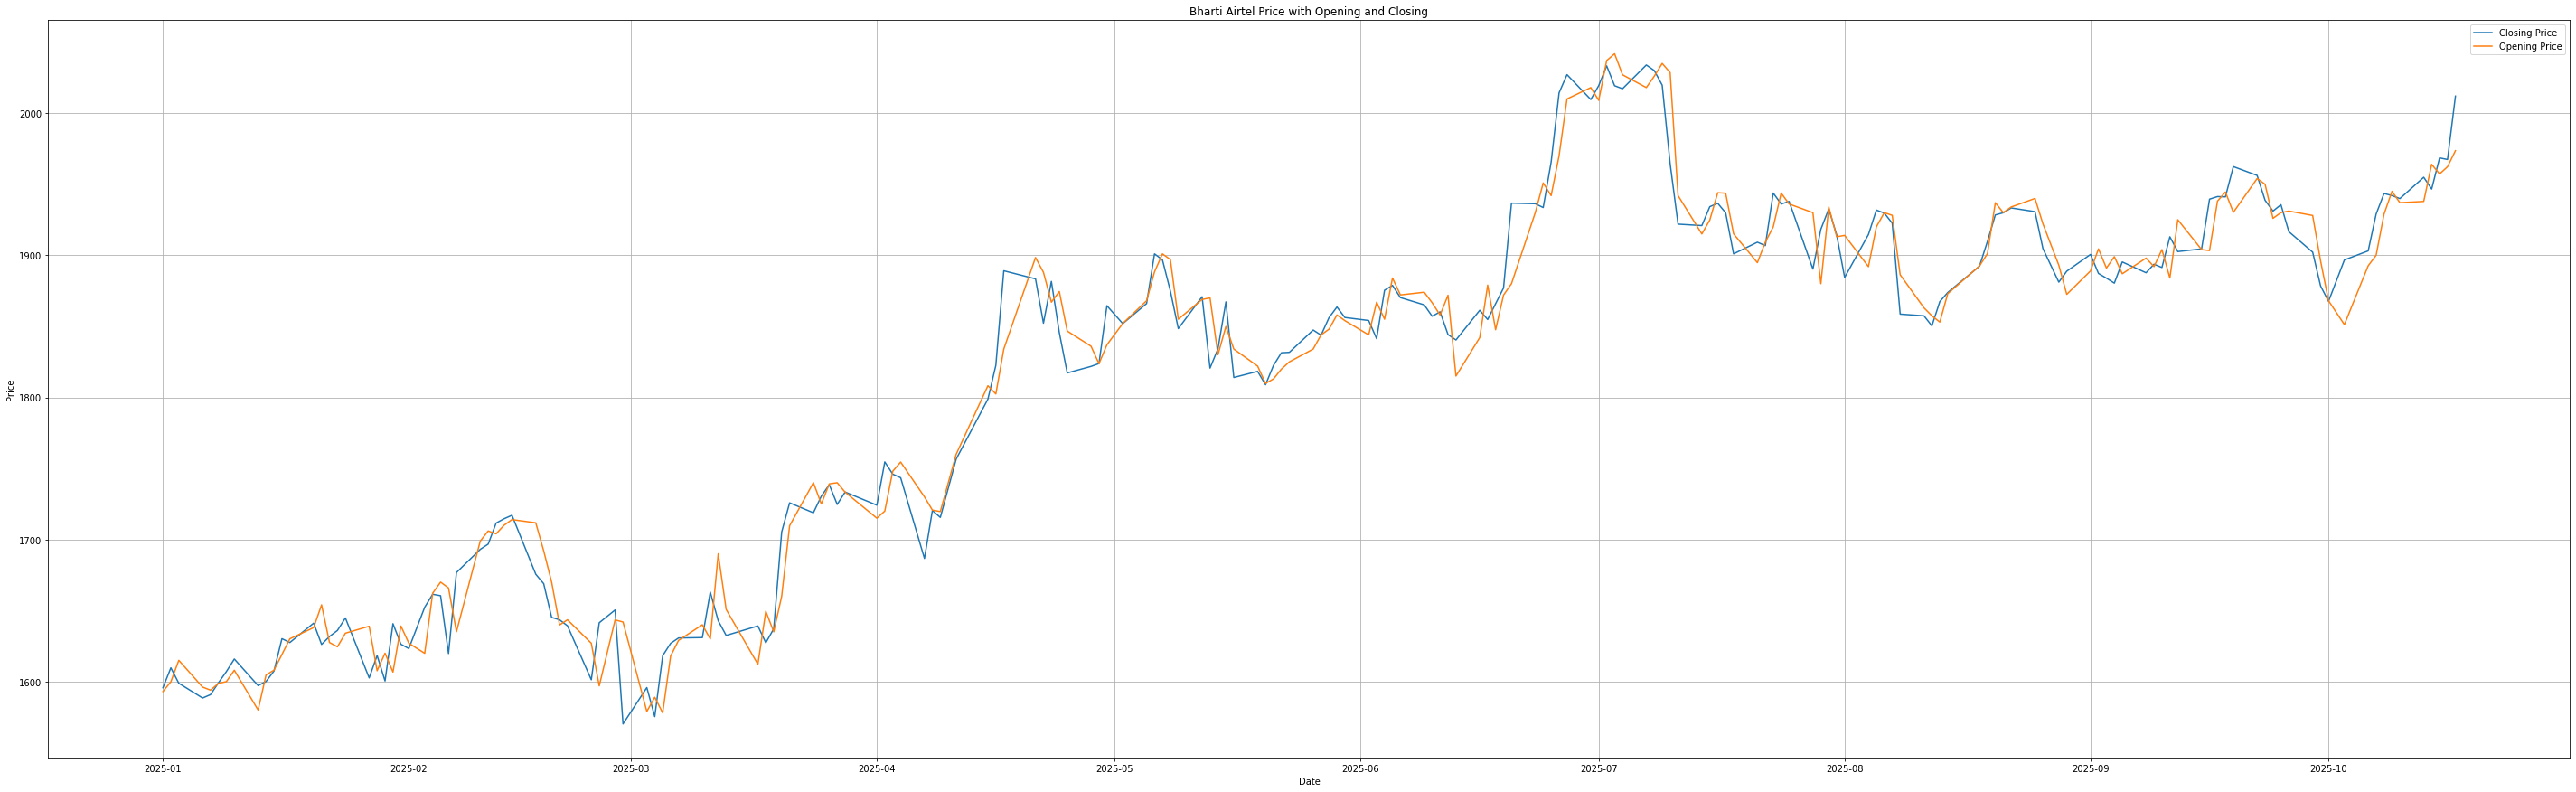

In [22]:
# Analyse the close and open data
plt.figure(figsize=(50,15))
plt.plot(data['Date '],data['close '], label='Closing Price')
plt.plot(data['Date '],data['OPEN '], label='Opening Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bharti Airtel Price with Opening and Closing")
plt.legend()   # Shows labels on top-right
plt.grid(True)
plt.show()

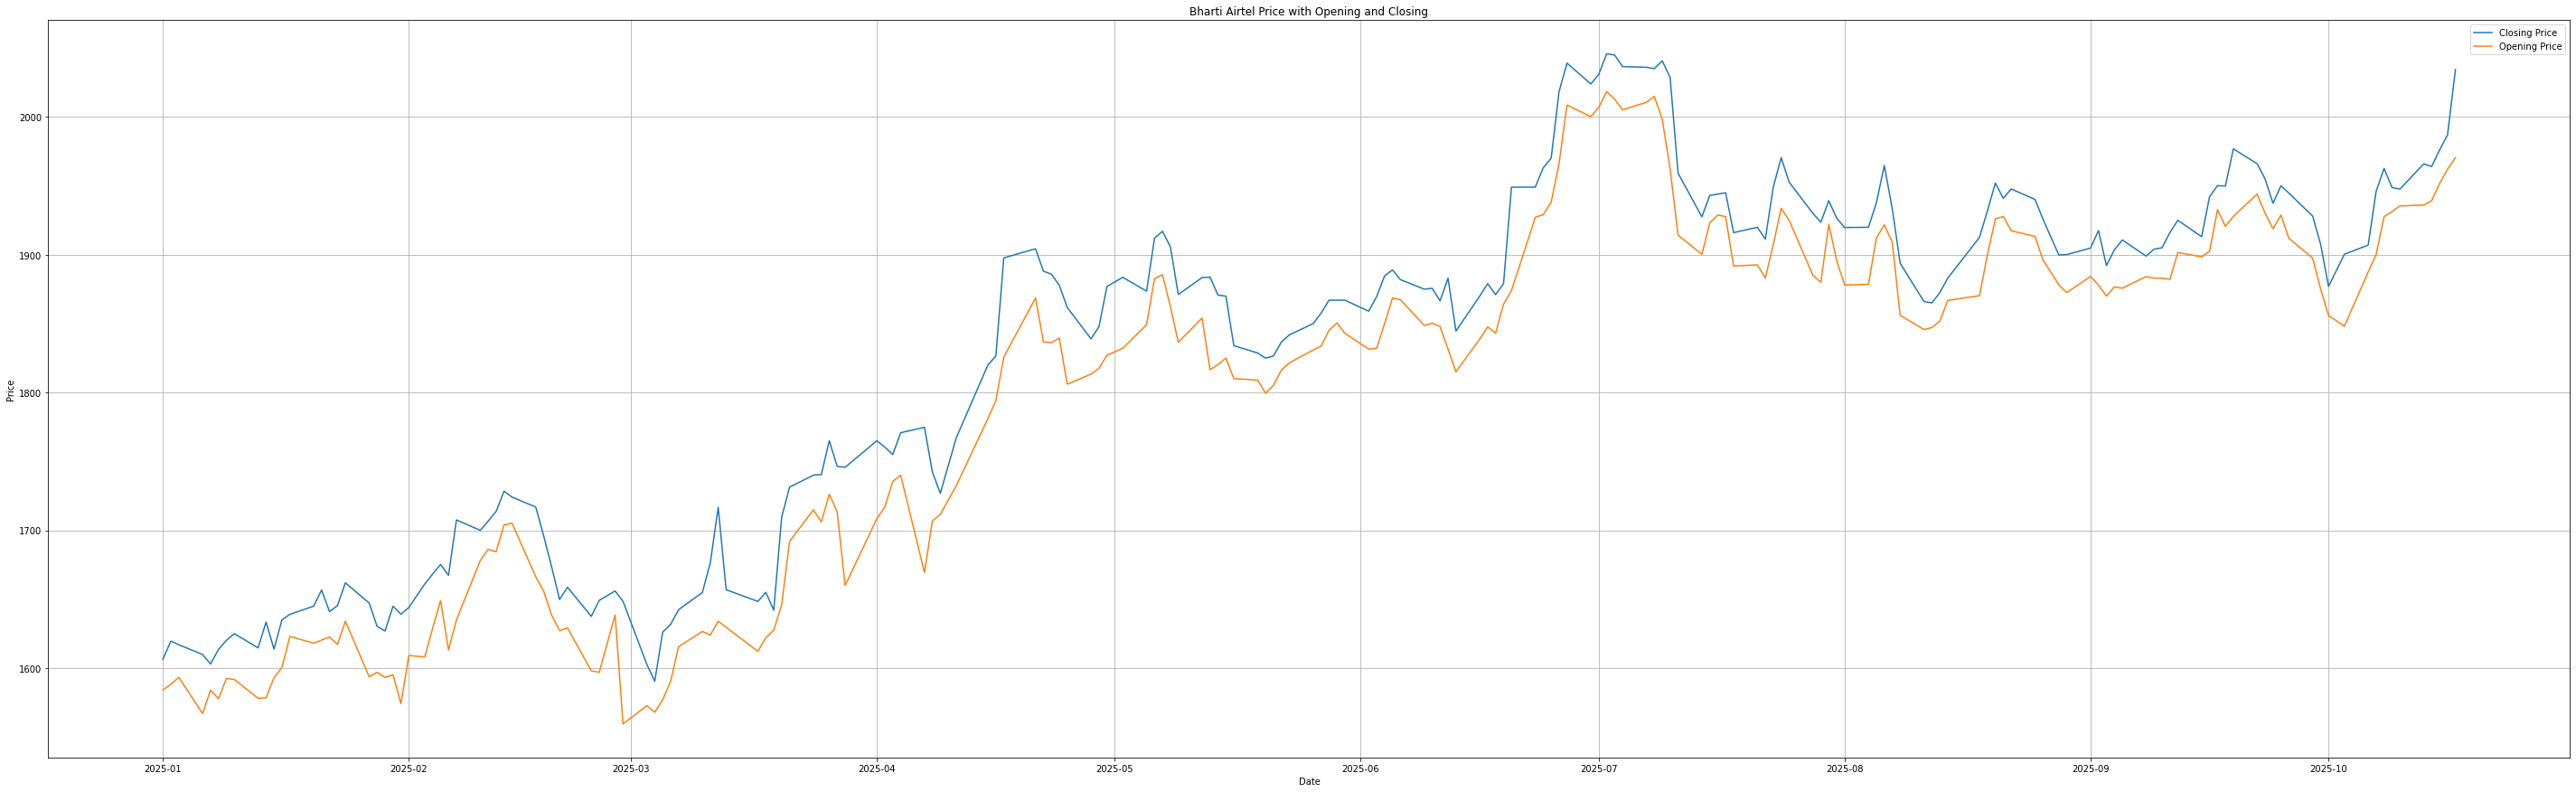

In [23]:
# Analyse the close and open data
plt.figure(figsize=(50,15))
plt.plot(data['Date '],data['HIGH '], label='Closing Price')
plt.plot(data['Date '],data['LOW '], label='Opening Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bharti Airtel Price with Opening and Closing")
plt.legend()   # Shows labels on top-right
plt.grid(True)
plt.show()